## 1 - Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    auc,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    roc_curve
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold


In [2]:
df = pd.read_csv('/content/data/DENGBR25.csv')

df.describe()

/tmp/ipython-input-1936543158.py:1: DtypeWarning: Columns (22,44,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data/DENGBR25.csv')


,TP_NOT,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,SEM_PRI,ANO_NASC,NU_IDADE_N,...,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,CS_FLXRET,FLXRECEBI,MIGRADO_W
count,1605624.0,1.605624e+06,1.605624e+06,1.605624e+06,1.605624e+06,1.557265e+06,1.605464e+06,1.605624e+06,1.601051e+06,1.605624e+06,...,0.0,0.0,0.0,0.0,0.0,1587307.0,4339.0,1.605624e+06,1.0,0.0
mean,2.0,2.025155e+05,2.024999e+03,3.607638e+01,3.632703e+05,1.458755e+03,4.088451e+06,2.025149e+05,1.988136e+03,4.025077e+03,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.034652e-01,2.0,NaN
std,0.0,9.558214e+00,3.678015e-02,7.121180e+00,7.084692e+04,3.807356e+02,2.612719e+06,9.487917e+00,2.007280e+01,1.308771e+02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.597545e-01,NaN,NaN
min,2.0,2.025010e+05,2.024000e+03,1.100000e+01,1.100010e+05,1.331000e+03,1.700000e+01,2.025010e+05,1.900000e+03,6.000000e+00,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.000000e+00,2.0,NaN
25%,2.0,2.025090e+05,2.025000e+03,3.500000e+01,3.504000e+05,1.342000e+03,2.087219e+06,2.025080e+05,1.974000e+03,4.020000e+03,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.000000e+00,2.0,NaN
50%,2.0,2.025140e+05,2.025000e+03,3.500000e+01,3.534400e+05,1.354000e+03,2.746298e+06,2.025130e+05,1.990000e+03,4.035000e+03,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.000000e+00,2.0,NaN
75%,2.0,2.025190e+05,2.025000e+03,3.500000e+01,3.555400e+05,1.465000e+03,6.595421e+06,2.025190e+05,2.004000e+03,4.050000e+03,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.000000e+00,2.0,NaN
max,2.0,2.025470e+05,2.025000e+03,5.300000e+01,5.300100e+05,6.256000e+03,9.999949e+06,2.025470e+05,2.981000e+03,4.407000e+03,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.000000e+00,2.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605624 entries, 0 to 1605623
Columns: 121 entries, TP_NOT to MIGRADO_W
dtypes: float64(92), int64(10), object(19)
memory usage: 1.4+ GB


## 2 - Limpeza

### 2.1 Validação
Objetivo: verificar a qualidade dos dados analisando os tipos, intervalos e coerências entre campos.

In [4]:
symptoms = [
    "ARTRALGIA", "ARTRITE", "CEFALEIA", "CONJUNTVIT", "DOR_COSTAS",
    "DOR_RETRO", "EXANTEMA", "FEBRE", "LACO", "LEUCOPENIA", "MIALGIA",
    "NAUSEA", "PETEQUIA_N", "VOMITO"
]

deseases = [
    "ACIDO_PEPT", "AUTO_IMUNE", "DIABETES",
    "HEMATOLOG", "HEPATOPAT", "HIPERTENSA",
    "RENAL"
]

geral = [
    "CS_GESTANT",
    "CS_SEXO",
    "NU_IDADE_N",
    "DT_SIN_PRI",
    "HOSPITALIZ"
]


considered_columns = geral + symptoms + deseases

### 2.2 Trivialidade
Objetivo: remover informações irrelevantes que não agregam valor.

In [5]:

# Remove linhas com valores NaN
df = df[considered_columns].copy()

df[considered_columns].isna().any(axis=1).sum()
df = df.dropna(subset=considered_columns)

print(df.shape)

(1213180, 26)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1213180 entries, 0 to 1603662
Data columns (total 26 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   CS_GESTANT  1213180 non-null  float64
 1   CS_SEXO     1213180 non-null  object 
 2   NU_IDADE_N  1213180 non-null  int64  
 3   DT_SIN_PRI  1213180 non-null  object 
 4   HOSPITALIZ  1213180 non-null  float64
 5   ARTRALGIA   1213180 non-null  float64
 6   ARTRITE     1213180 non-null  float64
 7   CEFALEIA    1213180 non-null  float64
 8   CONJUNTVIT  1213180 non-null  float64
 9   DOR_COSTAS  1213180 non-null  float64
 10  DOR_RETRO   1213180 non-null  float64
 11  EXANTEMA    1213180 non-null  float64
 12  FEBRE       1213180 non-null  float64
 13  LACO        1213180 non-null  float64
 14  LEUCOPENIA  1213180 non-null  float64
 15  MIALGIA     1213180 non-null  float64
 16  NAUSEA      1213180 non-null  float64
 17  PETEQUIA_N  1213180 non-null  float64
 18  VOMITO      1213180 non-nul

### 2.3 Deduplicacao
Objetivo: eliminar registros duplicados.

In [7]:
print(f"Total de linhas duplicadas: {df.duplicated().sum()}")
df = df.drop_duplicates()

Total de linhas duplicadas: 219314


In [8]:
print(df.shape)

(993866, 26)


### 2.4 Codificação/ Consistência
Objetivo:
<p>
•	converter variáveis categóricas em formato numérico binário, através da aplicação de **técnicas de codificação**.
<p>
•	garantir que os dados sigam padrões e formatos uniformes.


In [9]:
# Remove as linhas onde a coluna HOSPITALIZ está vazia ou contém o valor 9
total_nulos = df['HOSPITALIZ'].isna().sum()
print(f"A coluna HOSPITALIZ possui {total_nulos} valores nulos.")

df = df.dropna(subset=['HOSPITALIZ'])
df = df[df['HOSPITALIZ'] != 9]

A coluna HOSPITALIZ possui 0 valores nulos.


In [10]:
df = df[df['CS_SEXO'] != 'I']

def gestante_bin(v):
    if v in [1, 2, 3, 4]:
        return 1.0   # gestante
    if v in [5, 6,9]:
        return 0.0   # não gestante

df["CS_GESTANT"] = df["CS_GESTANT"].apply(gestante_bin)

Criação de variáveis binárias para facilitar a análise.
- A variável de hospitalização será convertida para formato binário onde 1 indica hospitalização e 0 indica não hospitalização.
- Variáveis clínicas para formato binário, onde 1 representa presença do sintoma/comorbidade e 0 representa ausência.

In [11]:
def sinan_bin(s):
    x = pd.to_numeric(s, errors="coerce")
    return x.map({1: 1.0, 2: 0.0})

variables = symptoms + deseases
df[variables] = df[variables].apply(sinan_bin)
df["HOSPITALIZ"] = sinan_bin(df["HOSPITALIZ"])

Conversão da variável de idade do formato SINAN para anos. O campo NU_IDADE_N armazena idade codificada onde os primeiros dígitos indicam a unidade (horas, dias, meses ou anos).

In [12]:
# valores a baixo de 1000 podem ser erro de digitação
# print(df['NU_IDADE_N'].value_counts().sort_index())
df = df[df['NU_IDADE_N'] >= 1000]
df = df[df['NU_IDADE_N'] // 1000 <= 4]


def age_years(nu_age):
    if pd.isna(nu_age):
        return np.nan

    try:
        nu_age = int(nu_age)
    except:
        return np.nan

    unidade = nu_age // 1000
    valor   = nu_age % 1000

    if unidade == 1:      # horas
        return valor / (24 * 365)
    elif unidade == 2:    # dias
        return valor / 365
    elif unidade == 3:    # meses
        return valor / 12
    elif unidade == 4:    # anos
        return valor
    else:
        return np.nan

df["AGE_YEARS"] = df["NU_IDADE_N"].apply(age_years)

bins = [0, 5, 15, 30, 50, 65, 120]
labels = ["0-4","5-14","15-29","30-49","50-64","65+"]

df["AGE_RANGE"] = pd.cut(df["AGE_YEARS"], bins=bins, labels=labels)

df = df.dropna(subset=['AGE_RANGE'])

In [13]:
print(df.shape)

(967429, 28)


## 3 - Análise gráfica de fatores associados a hospitalização


### 3.1 Visualização Geral de Hospitalizações

Grafico para mostrar proporção de casos hospitalizados vs total de casos notificados.

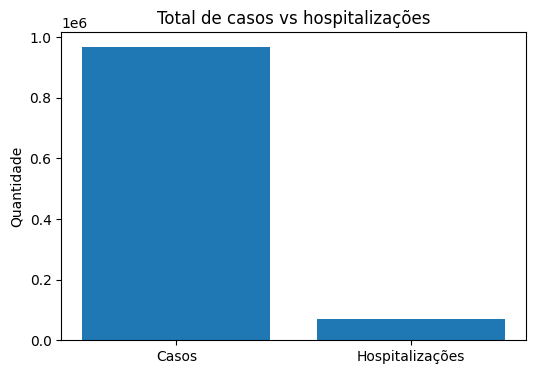

In [14]:
total_ocurrences = df["HOSPITALIZ"].notna().sum()
total_hospitalized = df["HOSPITALIZ"].sum()

labels = ["Casos", "Hospitalizações"]
values = [total_ocurrences, total_hospitalized]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylabel("Quantidade")
plt.title("Total de casos vs hospitalizações")
plt.show()

### 3.2 Impacto de Sintomas e Comorbidades

Análise do impacto cada sintoma e comorbidade na taxa de hospitalização. O objetivo é identificar quais variáveis clínicas estão associadas com casos graves que necessitam hospitalização.

Cálculo da diferença na taxa de hospitalização entre pacientes com e sem cada sintoma/comorbidade.

**Como interpretar**: Valores positivos indicam que a presença do sintoma/doença aumenta a probabilidade de hospitalização. A diferença é medida em **pontos percentuais (pp)**.

**Exemplo prático**: Se 5% dos pacientes sem diabetes são hospitalizados e 15% dos pacientes com diabetes são hospitalizados, a diferença é de +10 pontos percentuais. Isso significa que ter diabetes está associado a um aumento de 10 pontos percentuais na taxa de hospitalização.

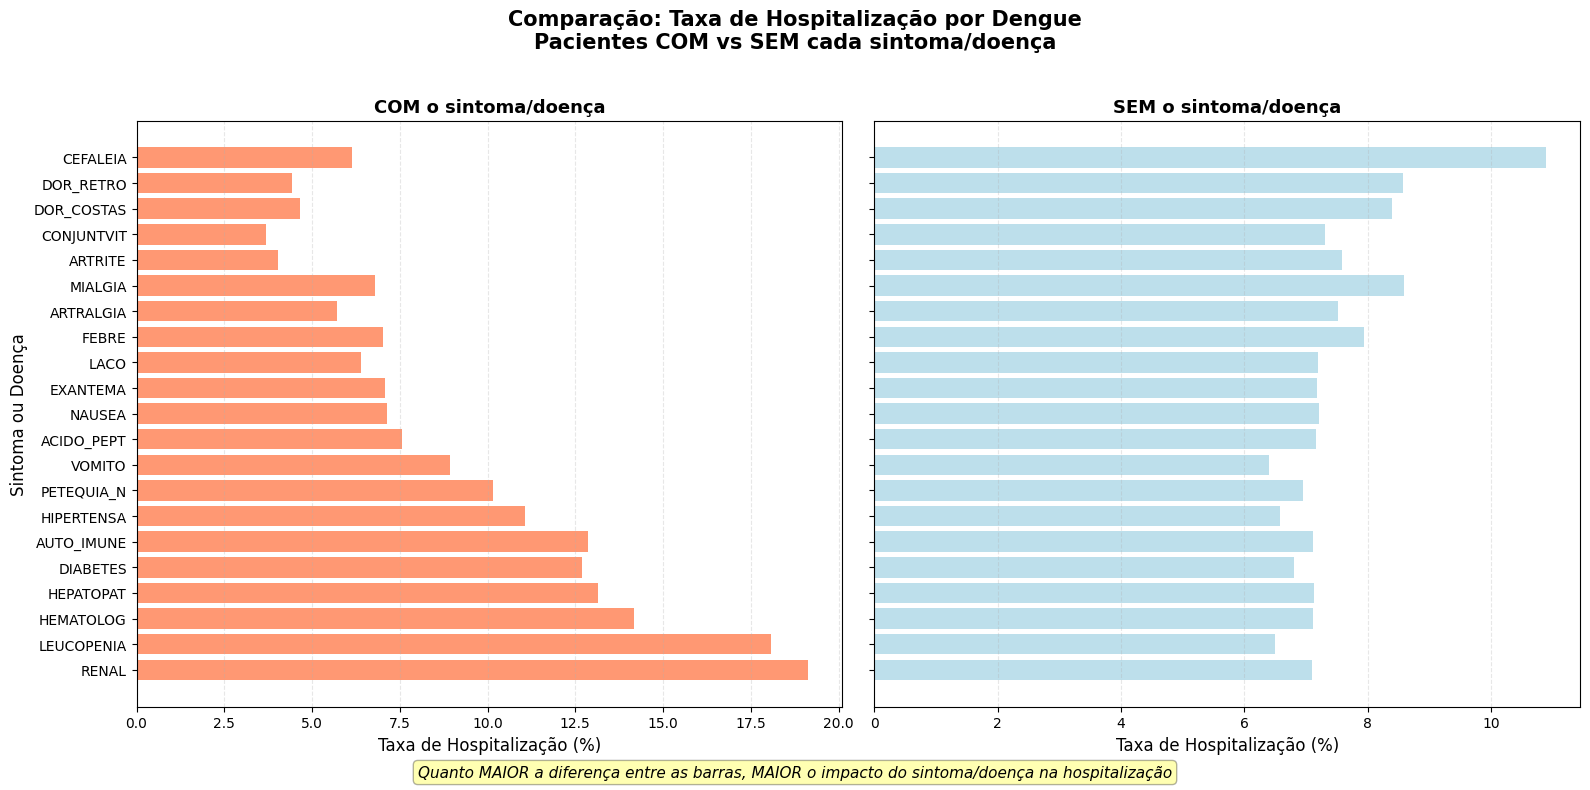

In [15]:
rates = []

for col in variables:
    tmp = pd.concat([df[col], df["HOSPITALIZ"]], axis=1).dropna()

    grp = tmp.groupby(col)["HOSPITALIZ"].mean()

    hosp_rate_no  = grp.get(0.0, np.nan)
    hosp_rate_yes = grp.get(1.0, np.nan)

    rates.append({
        "symptom": col,
        "hosp_rate_no": hosp_rate_no,
        "hosp_rate_yes": hosp_rate_yes,
        "delta_pp": (hosp_rate_yes - hosp_rate_no) * 100
    })

rates_df = pd.DataFrame(rates).sort_values("delta_pp", ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.barh(rates_df["symptom"], rates_df["hosp_rate_yes"] * 100, color='coral', alpha=0.8)
ax1.set_xlabel("Taxa de Hospitalização (%)", fontsize=12)
ax1.set_ylabel("Sintoma ou Doença", fontsize=12)
ax1.set_title("COM o sintoma/doença", fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3, linestyle='--')

ax2.barh(rates_df["symptom"], rates_df["hosp_rate_no"] * 100, color='lightblue', alpha=0.8)
ax2.set_xlabel("Taxa de Hospitalização (%)", fontsize=12)
ax2.set_title("SEM o sintoma/doença", fontsize=13, fontweight='bold')
ax2.set_yticklabels([])  # Remove labels duplicados
ax2.grid(axis='x', alpha=0.3, linestyle='--')

fig.suptitle('Comparação: Taxa de Hospitalização por Dengue\nPacientes COM vs SEM cada sintoma/doença',
             fontsize=15, fontweight='bold', y=0.98)

fig.text(0.5, 0.02,
         'Quanto MAIOR a diferença entre as barras, MAIOR o impacto do sintoma/doença na hospitalização',
         ha='center', fontsize=11, style='italic',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### 3.3 Análise por Faixa Etária e Doença

Investigação da relação entre idade, presença de doença(diabetes) e risco de hospitalização.
 A idade é uma variável importante em dengue, especialmente quando combinada com comorbidades como diabetes.


/tmp/ipython-input-225671154.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["AGE_RANGE", "DIABETES"])["HOSPITALIZ"]


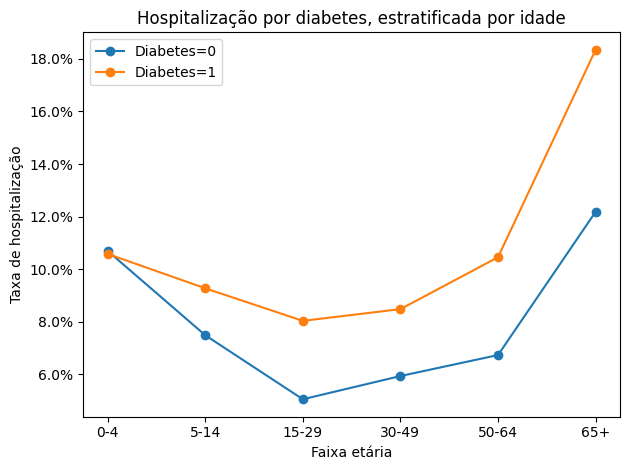

In [16]:
tmp = pd.concat([
    df["DIABETES"],
    df["HOSPITALIZ"],
    df["AGE_RANGE"]
], axis=1).dropna()

rate_age = (
    tmp
    .groupby(["AGE_RANGE", "DIABETES"])["HOSPITALIZ"]
    .mean()
    .reset_index()
)
rate_age

for v in [0.0, 1.0]:
    sub = rate_age[rate_age["DIABETES"] == v]
    plt.plot(sub["AGE_RANGE"], sub["HOSPITALIZ"], marker="o", label=f"Diabetes={int(v)}")

plt.ylabel("Taxa de hospitalização")
plt.xlabel("Faixa etária")
plt.title("Hospitalização por diabetes, estratificada por idade")

plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

### 3.4 Sazonalidade da Hospitalização

Análise temporal para identificar padrões sazonais na taxa de hospitalização.

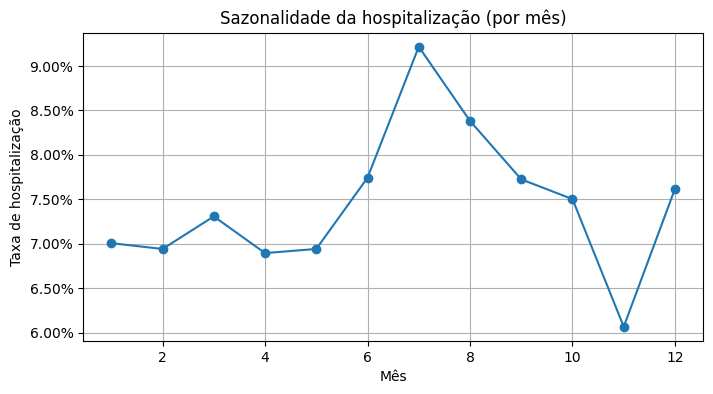

In [17]:
dt_sint = pd.to_datetime(df["DT_SIN_PRI"], errors="coerce")
dt_mes = dt_sint.dt.month

tmp = pd.concat([df["HOSPITALIZ"], dt_mes.rename("MES")], axis=1).dropna()

rate_month = (
    tmp
    .groupby("MES")["HOSPITALIZ"]
    .mean()
)

plt.figure(figsize=(8,4))
rate_month.plot(marker="o")
plt.xlabel("Mês")
plt.ylabel("Taxa de hospitalização")
plt.title("Sazonalidade da hospitalização (por mês)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(True)
plt.show()

### 3.5 Fatores de Risco Específicos

Comparação da taxa de hospitalização entre gestantes e não gestantes. A gravidez é um fator de risco conhecido para complicações de dengue.

            HOSPITALIZ
CS_GESTANT            
0.0           0.067446
1.0           0.136163


<Figure size 800x500 with 0 Axes>

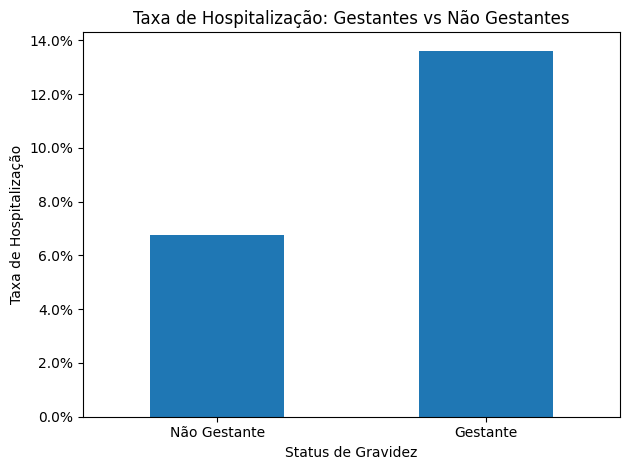

In [18]:
df_f = df[df["CS_SEXO"].eq("F")].copy()

tmp = pd.concat([df["CS_GESTANT"], df["HOSPITALIZ"].loc[df_f.index]], axis=1).dropna()

resultado_gestantes = tmp.groupby("CS_GESTANT").mean()
print(resultado_gestantes)

# Gráfico de barras para gestantes
plt.figure(figsize=(8, 5))
resultado_gestantes.plot(kind='bar', legend=False)
plt.xlabel("Status de Gravidez")
plt.ylabel("Taxa de Hospitalização")
plt.title("Taxa de Hospitalização: Gestantes vs Não Gestantes")
plt.xticks([0, 1], ['Não Gestante', 'Gestante'], rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

### 3.6 Distribuição de Casos por Faixa Etária

Visualização da quantidade de casos em cada faixa etária para identificar os grupos mais afetados.

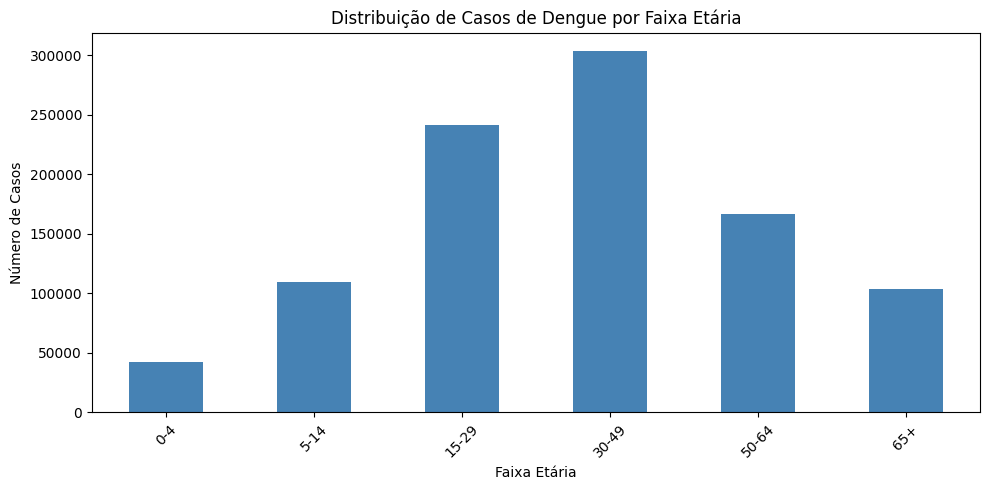

In [19]:
# Distribuição por faixa etária
faixa_counts = df["AGE_RANGE"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
faixa_counts.plot(kind='bar', color='steelblue')
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Casos")
plt.title("Distribuição de Casos de Dengue por Faixa Etária")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.7 Correlação entre Sintomas

Mapa de calor mostrando a correlação entre diferentes sintomas. Valores próximos a 1 indicam que os sintomas tendem a aparecer juntos.

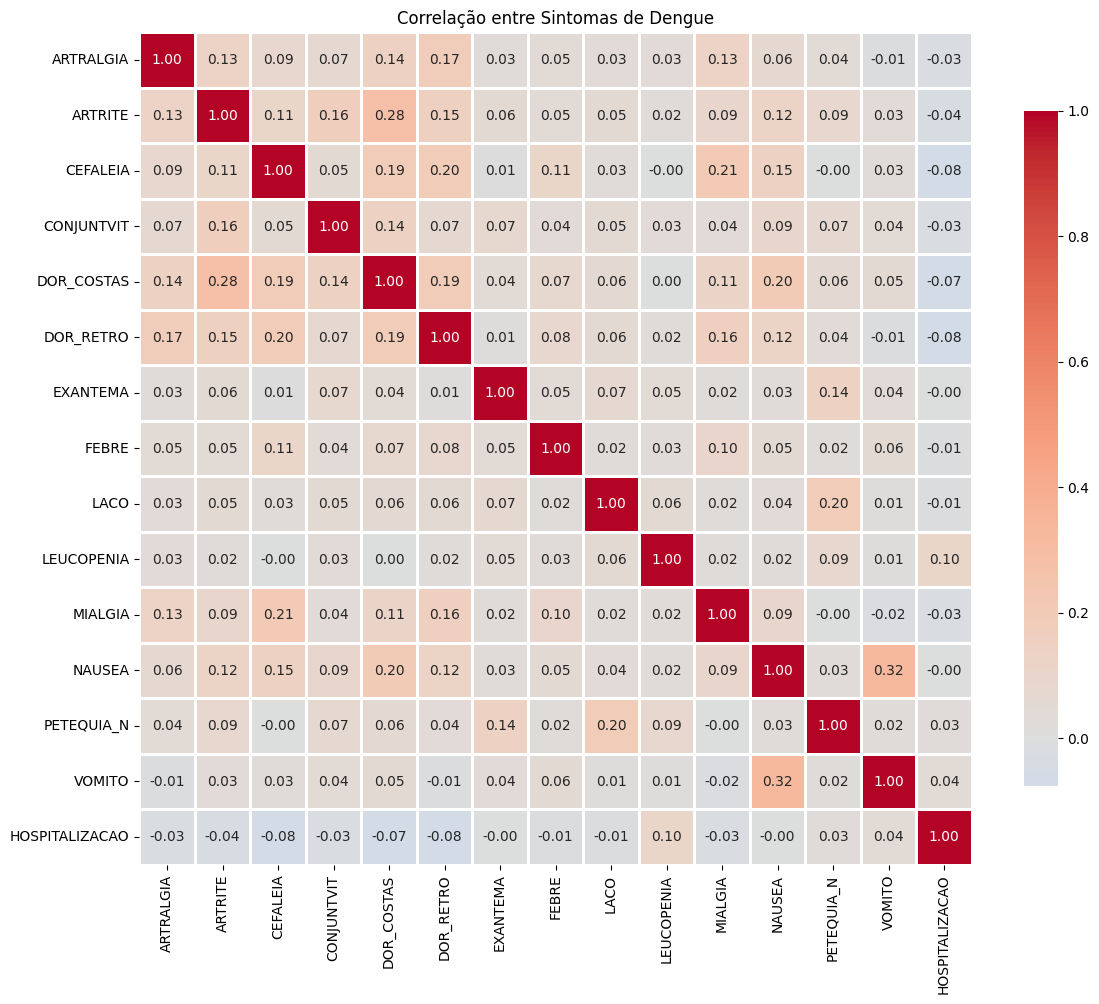

In [20]:
# Heatmap de correlação entre sintomas
# Cria um DataFrame com sintomas e hospitalização para correlação
symptoms_with_hosp = df[symptoms].copy()
symptoms_with_hosp["HOSPITALIZACAO"] = df["HOSPITALIZ"]
correlacao = symptoms_with_hosp.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Correlação entre Sintomas de Dengue")
plt.tight_layout()
plt.show()

## 4 - Preparação para ML

In [21]:
print(df["HOSPITALIZ"].value_counts())

HOSPITALIZ
0.0    898108
1.0     69321
Name: count, dtype: int64


Identifica quais colunas são do tipo texto

In [22]:
colunas_texto = df.select_dtypes(include=['object']).columns.tolist()

print(f"Colunas que precisam de conversão: {colunas_texto}")

Colunas que precisam de conversão: ['CS_SEXO', 'DT_SIN_PRI']


Label encoder para coluna CS_SEXO

In [23]:
le = LabelEncoder()

df['CS_SEXO'] = le.fit_transform(df['CS_SEXO'])

Ajustes para colunas no formato de data

In [24]:
# Garante que a coluna está no formato de data
df['DT_SIN_PRI'] = pd.to_datetime(df['DT_SIN_PRI'])

# Extrai os componentes numéricos
df['ANO_SIN'] = df['DT_SIN_PRI'].dt.year
df['MES_SIN'] = df['DT_SIN_PRI'].dt.month
df['DIA_SIN'] = df['DT_SIN_PRI'].dt.day
df['DIA_SEMANA_SIN'] = df['DT_SIN_PRI'].dt.dayofweek # 0=Segunda, 6=Domingo

# Agora que temos os números, removemos a coluna original de data
df = df.drop('DT_SIN_PRI', axis=1)
df = df.drop('AGE_RANGE', axis=1)

Se der algo como 95% para 0 e 5% para 1, está desbalanceado.

In [25]:
print(df['HOSPITALIZ'].value_counts(normalize=True))

HOSPITALIZ
0.0    0.928345
1.0    0.071655
Name: proportion, dtype: float64


Função para preparar os dataframes para os modelos, no caso, normalizando e balanceado o dataframe.

In [26]:
def preparar_dados(df, target_col):
    # 1. Separar X e y
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    #scaler = StandardScaler()
    # 2. Divisão Treino e Teste (80/20)
    # O stratify é vital aqui para manter a proporção da hospitalização
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3. Padronização (Fit apenas no treino para evitar Leakage)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Balanceamento (SMOTE) apenas no treino
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

    return X_train_res, X_test_scaled, y_train_res, y_test, scaler

In [27]:
# Dados tratados para o uso no modelos
# Seleciona aleatoriamente 10.000 registros do DataFrame para acelerar testes de modelagem, mantendo reprodutibilidade.
df = df.sample(n=10000, random_state=42)
X_train_res, X_test_scaled, y_train_res, y_test, scaler = preparar_dados(df, 'HOSPITALIZ')

In [28]:
print(df.shape)

(10000, 30)


## 5 - Modelos

### 5.1 RANDOM FOREST

In [29]:
# FUNÇÃO: treinar e plotar RF com dados já preparados
def treinar_e_plotar_rf_df(
    X_train_res, X_test_scaled, y_train_res, y_test,
    feature_names,
    nome,
    n_estimators=50,
    max_depth=5,
    n_plot=5,
    random_state=42,
    min_samples_leaf=10,
    min_samples_split=10,
    max_features="sqrt"
):
    # SMOTE já balanceou, não usamos class_weight
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=random_state,
        n_jobs=-1
    )

    rf.fit(X_train_res, y_train_res)
    y_pred = rf.predict(X_test_scaled)

    print(f"\n===== {nome} =====")

    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("Score treino:", rf.score(X_train_res, y_train_res))
    print("Score teste:", rf.score(X_test_scaled, y_test))


    class_map = {1.0: "Grave", 2.0: "Não grave"}
    class_names = [class_map.get(c, str(c)) for c in rf.classes_]

    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
    tree.plot_tree(
        rf.estimators_[0],
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        ax=ax
    )
    ax.set_title(f"{nome} - Árvore 0")
    fig.tight_layout()
    fig.savefig(f"{nome}_arvore0.png")
    plt.show()


    n_plot = min(n_plot, len(rf.estimators_))
    fig, axes = plt.subplots(1, n_plot, figsize=(4*n_plot, 4), dpi=300)
    if n_plot == 1:
        axes = [axes]

    for i in range(n_plot):
        tree.plot_tree(
            rf.estimators_[i],
            feature_names=feature_names,
            class_names=class_names,
            filled=True,
            ax=axes[i]
        )
        axes[i].set_title(f"Estimator {i}", fontsize=10)

    fig.tight_layout()
    fig.savefig(f"{nome}_{n_plot}arvores.png")
    plt.show()

    # Retorna modelo + teste (para ROC depois)
    return rf, X_test_scaled, y_test


X_train_convert, X_test_convert, y_train_convert, y_test_convert, scaler = preparar_dados(
    df, "HOSPITALIZ"
)

feature_names_convert = list(
    df.drop(columns=["HOSPITALIZ"]).columns
)

rf_convertido, X_test_convert, y_test_convert = treinar_e_plotar_rf_df(
    X_train_convert, X_test_convert, y_train_convert, y_test_convert,
    feature_names_convert,
    nome="RANDOM FOREST",
    n_estimators=50,
    max_depth=10,
    n_plot=10
)

Output hidden; open in https://colab.research.google.com to view.

ROC AUC: 0.6498383743449533


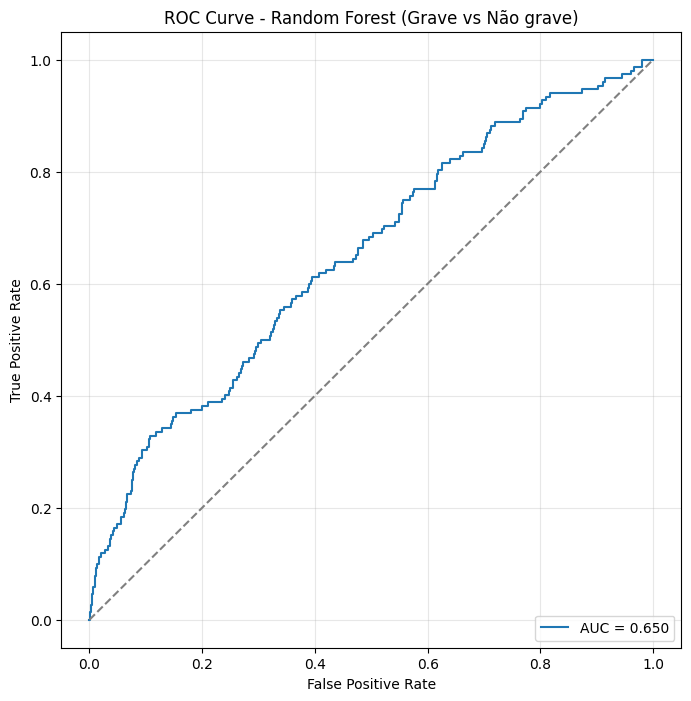

In [30]:
# índice da classe "Grave" (1.0)
idx_grave = list(rf_convertido.classes_).index(1.0)

# probabilidade da classe Grave
y_prob = rf_convertido.predict_proba(X_test_convert)[:, idx_grave]

# curva ROC
fpr, tpr, thresholds = roc_curve(y_test_convert, y_prob, pos_label=1.0)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# plot
plt.figure(figsize=(8, 8))
plt.title("ROC Curve - Random Forest (Grave vs Não grave)")
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### 5.2 K-Nearest Neighbors (KNN)

ENCONTRAR O MELHOR K

Testando diferentes valores de k...



Text(0, 0.5, 'Erro médio')

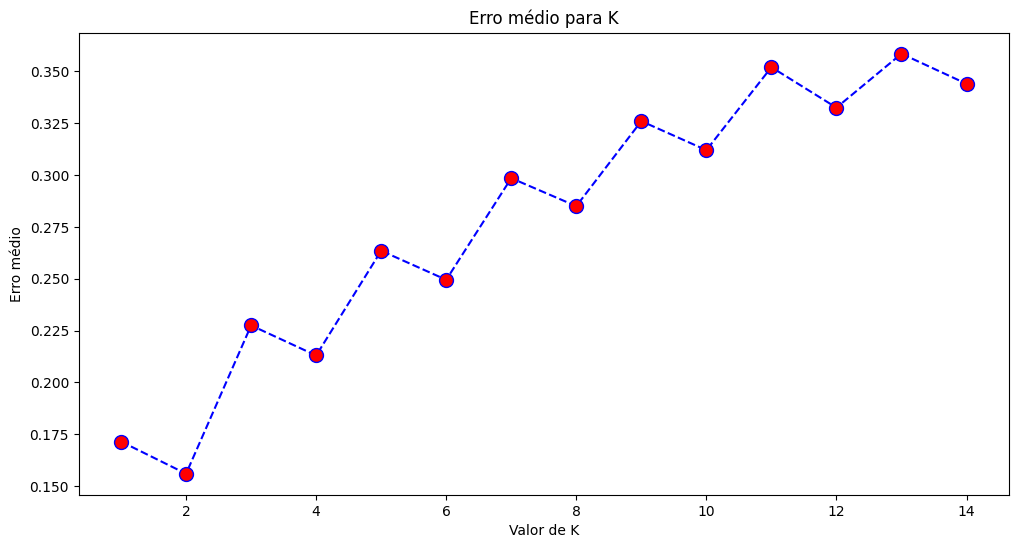

In [31]:
print('Testando diferentes valores de k...\n')
error = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res)
    pred_k = knn.predict(X_test_scaled)
    error.append(np.mean(pred_k != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Erro médio para K')
plt.xlabel('Valor de K')
plt.ylabel('Erro médio')

Buscar os melhores parâmetros

In [32]:
param_grid = {'n_neighbors':[2,3,4], #total de vizinhos
              'weights': ['uniform', 'distance'], #Função de peso usada na previsão
              'metric':['cosine', 'euclidean', 'manhattan'] #métrica para cálculo da distância
             }

# Métrica de desempenho = melhor acurácia
gs_metric = make_scorer(accuracy_score, greater_is_better=True)

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=param_grid,
                    scoring=gs_metric,
                    cv=5, n_jobs=4, verbose=3) #cv = gerador de validação cruzada / n_jobs = determina a quantidade de jobs processados

grid.fit(X_train_res, y_train_res) #Selecionando os melhores hiperparametros com base nos dados de treino
knn_params = grid.best_params_
print('KNN', knn_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
KNN {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


Treinar o modelo final com os melhores parâmetros

In [33]:
# TREINAR MODELO FINAL COM MELHOR K
knn_final = KNeighborsClassifier(
    n_neighbors=2, #best_k,
    metric='manhattan',
    weights='uniform',  # Pesa vizinhos mais próximos
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

knn_final.fit(X_train_res, y_train_res)

# FAZER PREDIÇÕES
y_pred = knn_final.predict(X_test_scaled)

# METRICAS
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'\n RESULTADOS DO KNN')
print(f'=' * 40)
print(f'k: {2}')
print(f'Acurácia: {accuracy:.4f}')
print(f'F1-Score (weighted): {f1:.4f}')
print(f'=' * 40)


 RESULTADOS DO KNN
k: 2
Acurácia: 0.8650
F1-Score (weighted): 0.8658


### 5.3 SUPPORT VECTOR MACHINE (SVM)

Buscando melhores parâmetros

In [34]:
gs_metric = make_scorer(balanced_accuracy_score, greater_is_better=True)

param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

svm_grid = GridSearchCV(
    estimator=SVC(probability=False, random_state=42),
    param_grid=param_grid,
    scoring=gs_metric,
    cv=3,
    n_jobs=-1,
    verbose=2
)

svm_grid.fit(X_train_res, y_train_res)

print("\nMelhores parâmetros (SVM):", svm_grid.best_params_)
print("Melhor score CV (balanced acc):", svm_grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits

Melhores parâmetros (SVM): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Melhor score CV (balanced acc): 0.891719599281719


Treinando e avaliando o modelo

In [35]:
svm_final = svm_grid.best_estimator_
svm_final.fit(X_train_res, y_train_res)
y_pred = svm_final.predict(X_test_scaled)

print("\n===== RESULTADOS DO SVM =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score (weighted):", f1_score(y_test, y_pred, average='weighted'))


===== RESULTADOS DO SVM =====
Accuracy: 0.839
F1-score (weighted): 0.8561733333333335


## 6 - AVALIAÇÃO DOS MODELOS


### 6.1 VALIDAÇÃO CRUZADA

In [36]:
def AplicaValidacaoCruzada(x, y):
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    knn = KNeighborsClassifier(
        n_neighbors=2,
        metric='manhattan',
        weights='uniform',
        n_jobs=-1
    )

    svm = svm_grid.best_estimator_   # precisa existir antes

    rf = RandomForestClassifier(
        n_estimators=50,
        max_depth=10,
        min_samples_leaf=10,
        min_samples_split=10,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

    knn_result = cross_val_score(knn, x, y, cv=kfold, scoring='accuracy')
    svm_result = cross_val_score(svm, x, y, cv=kfold, scoring='accuracy')
    rf_result  = cross_val_score(rf,  x, y, cv=kfold, scoring='accuracy')

    dic_models = {
        "KNN": knn_result.mean(),
        "SVM": svm_result.mean(),
        "Random Forest": rf_result.mean()
    }

    melhorModelo = max(dic_models, key=dic_models.get)

    print("\n===== VALIDAÇÃO CRUZADA (Accuracy) =====")
    print(f"KNN:           {knn_result.mean():.4f}")
    print(f"SVM:           {svm_result.mean():.4f}")
    print(f"Random Forest: {rf_result.mean():.4f}")

    print("\nMelhor modelo:", melhorModelo,
          "com accuracy =", f"{dic_models[melhorModelo]:.4f}")

In [37]:
AplicaValidacaoCruzada(X_train_res, y_train_res)



===== VALIDAÇÃO CRUZADA (Accuracy) =====
KNN:           0.9443
SVM:           0.8996
Random Forest: 0.8749

Melhor modelo: KNN com accuracy = 0.9443


### 6.2 MATRIZ DE CONFUSÃO E CLASSIFICATION REPORT

In [38]:
def avaliar_modelos_com_matriz(
    modelos_dict,      # {"RF": rf_model, "KNN": knn_model, "SVM": svm_model}
    X_test_scaled,
    y_test
):
    # rótulos reais das classes (ordem correta)
    labels = [1.0, 2.0]
    tick_names = ["Grave", "Não grave"]

    for nome, modelo in modelos_dict.items():
        y_pred = modelo.predict(X_test_scaled)

        print(f"\n===== {nome} =====")
        print(classification_report(
            y_test,
            y_pred,
            target_names=tick_names,
            digits=4
        ))

        matriz_confusao = confusion_matrix(
            y_test,
            y_pred,
            labels=labels
        )

        plt.figure(figsize=(6, 4))
        sns.heatmap(
            matriz_confusao,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=tick_names,
            yticklabels=tick_names
        )
        plt.title(f"Matriz de Confusão - {nome}")
        plt.xlabel("Predição")
        plt.ylabel("Dados Reais")
        plt.tight_layout()
        plt.show()


===== Random Forest =====
              precision    recall  f1-score   support

       Grave     0.9411    0.8826    0.9109      1848
   Não grave     0.1873    0.3289    0.2387       152

    accuracy                         0.8405      2000
   macro avg     0.5642    0.6058    0.5748      2000
weighted avg     0.8838    0.8405    0.8598      2000



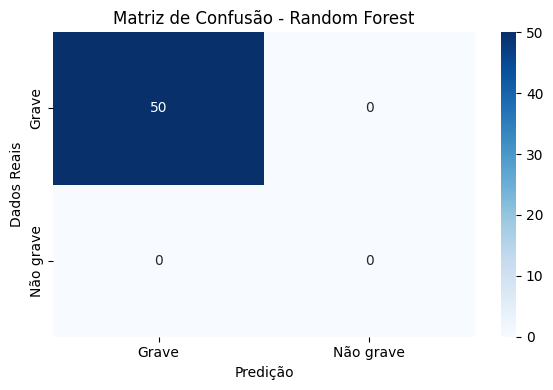


===== KNN =====
              precision    recall  f1-score   support

       Grave     0.9279    0.9259    0.9269      1848
   Não grave     0.1218    0.1250    0.1234       152

    accuracy                         0.8650      2000
   macro avg     0.5248    0.5254    0.5251      2000
weighted avg     0.8666    0.8650    0.8658      2000



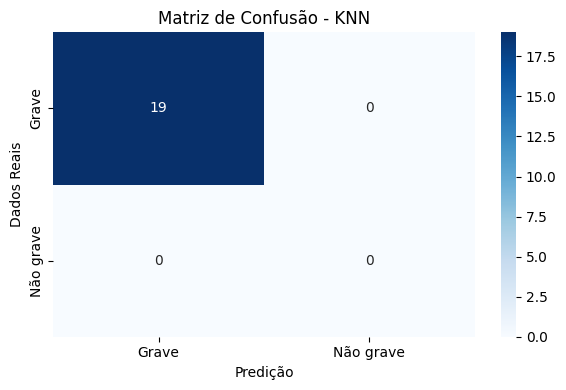


===== SVM =====
              precision    recall  f1-score   support

       Grave     0.9355    0.8869    0.9106      1848
   Não grave     0.1573    0.2566    0.1950       152

    accuracy                         0.8390      2000
   macro avg     0.5464    0.5717    0.5528      2000
weighted avg     0.8764    0.8390    0.8562      2000



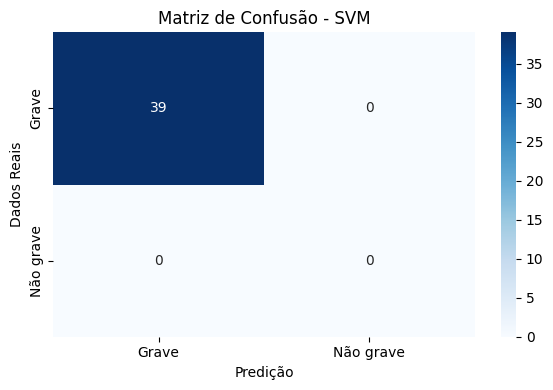

In [39]:
modelos = {
    "Random Forest": rf_convertido,
    "KNN": knn_final,
    "SVM": svm_final
}

avaliar_modelos_com_matriz(modelos, X_test_convert, y_test_convert)



### Interpretando matriz de confusão Random Forest:

Grave → Grave (Verdadeiros Positivos)
O modelo classificou corretamente a maioria dos casos graves.
Isso se reflete no alto recall da classe Grave (0,8826), indicando que o modelo consegue identificar bem pacientes realmente graves.

Grave → Não grave (Falsos Negativos)
Uma parcela dos casos graves foi classificada como não grave.
Embora não seja dominante, esse tipo de erro é relevante em contexto clínico, pois pode levar à subestimação da gravidade.

Não grave → Grave (Falsos Positivos)
O modelo frequentemente classifica casos não graves como graves.
Isso explica a baixa precisão da classe Não grave (0,1873): quando o modelo prevê “Não grave”, ele erra muitas vezes.

Não grave → Não grave (Verdadeiros Negativos)
O número de acertos para a classe Não grave é relativamente baixo, o que também se reflete no recall reduzido dessa classe (0,3289).

### Interpretando matriz de confusão KNN:

Grave → Grave (Verdadeiros Positivos)
O modelo KNN classificou corretamente a maior parte dos casos graves, o que se reflete no alto recall da classe Grave (0,9259). Isso indica que o modelo tem grande capacidade de identificar pacientes realmente graves.

Grave → Não grave (Falsos Negativos)
Poucos casos graves foram classificados como não graves, o que é positivo do ponto de vista clínico, pois reduz o risco de subestimar a gravidade da doença.

Não grave → Grave (Falsos Positivos)
A maioria dos casos não graves foi incorretamente classificada como grave. Isso explica a baixa precisão da classe Não grave (0,1218), indicando que o modelo tende a superestimar a gravidade.

Não grave → Não grave (Verdadeiros Negativos)
O número de acertos para a classe Não grave é extremamente reduzido, refletindo o baixo recall dessa classe (0,1250).

### Interpretando matriz de confusão KNN:

Grave → Grave (Verdadeiros Positivos)
O SVM classificou corretamente a maior parte dos casos graves, o que é confirmado pelo alto recall da classe Grave (0,8869). Isso indica que o modelo é eficiente em reconhecer pacientes realmente graves.

Grave → Não grave (Falsos Negativos)
Uma parcela dos casos graves foi classificada como não grave. Embora não seja predominante, esse tipo de erro é relevante em contexto clínico, pois pode resultar na subavaliação da gravidade.

Não grave → Grave (Falsos Positivos)
O modelo apresenta dificuldade em identificar corretamente os casos não graves, classificando grande parte deles como graves. Isso se reflete na baixa precisão da classe Não grave (0,1573).

Não grave → Não grave (Verdadeiros Negativos)
O número de acertos da classe Não grave é reduzido, o que explica o baixo recall dessa classe (0,2566).

## 7 - TESTE DO MELHOR MODELO


In [40]:
# pegamos um paciente aleatório do df original
linha = df.drop(columns=["HOSPITALIZ"]).sample(1, random_state=79)

print("Dados do paciente:")
print(linha.T)

linha_scaled = scaler.transform(linha)

# predição com KNN
pred = knn_final.predict(linha_scaled)[0]
proba = knn_final.predict_proba(linha_scaled)[0]

# probabilidade da classe Grave (1.0)
idx_grave = list(knn_final.classes_).index(1.0)
prob_grave = proba[idx_grave]

print("\nPredição (KNN):", "Grave" if pred == 1.0 else "Não grave")
print("Probabilidade de Grave:", prob_grave)
print("Probabilidades por classe:", dict(zip(knn_final.classes_, proba)))

Dados do paciente:
                1177902
CS_GESTANT          0.0
CS_SEXO             1.0
NU_IDADE_N       4074.0
ARTRALGIA           0.0
ARTRITE             0.0
CEFALEIA            0.0
CONJUNTVIT          0.0
DOR_COSTAS          0.0
DOR_RETRO           0.0
EXANTEMA            0.0
FEBRE               1.0
LACO                0.0
LEUCOPENIA          0.0
MIALGIA             1.0
NAUSEA              0.0
PETEQUIA_N          0.0
VOMITO              0.0
ACIDO_PEPT          0.0
AUTO_IMUNE          0.0
DIABETES            1.0
HEMATOLOG           0.0
HEPATOPAT           0.0
HIPERTENSA          0.0
RENAL               0.0
AGE_YEARS          74.0
ANO_SIN          2025.0
MES_SIN             3.0
DIA_SIN            12.0
DIA_SEMANA_SIN      2.0

Predição (KNN): Grave
Probabilidade de Grave: 1.0
Probabilidades por classe: {np.float64(0.0): np.float64(0.0), np.float64(1.0): np.float64(1.0)}


TARGET DO PACIENTE NO DF

In [41]:
linha_com_target = df.sample(1, random_state=79)
y_real = linha_com_target["HOSPITALIZ"].iloc[0]

print("\nReal:", "Grave" if y_real == 1.0 else "Não grave")
print("Previsto:", "Grave" if pred == 1.0 else "Não grave")


Real: Grave
Previsto: Grave


CRIANDO PACIENTE FICTÍCIO

In [42]:
paciente = {
    "CS_GESTANT": 0.0,
    "CS_SEXO": 1.0,
    "NU_IDADE_N": 4072.0,
    "ARTRALGIA": 0.0,
    "ARTRITE": 0.0,
    "CEFALEIA": 1.0,
    "CONJUNTVIT": 0.0,
    "DOR_COSTAS": 0.0,
    "DOR_RETRO": 1.0,
    "EXANTEMA": 0.0,
    "FEBRE": 1.0,
    "LACO": 0.0,
    "LEUCOPENIA": 0.0,
    "MIALGIA": 1.0,
    "NAUSEA": 0.0,
    "PETEQUIA_N": 0.0,
    "VOMITO": 0.0,
    "ACIDO_PEPT": 0.0,
    "AUTO_IMUNE": 0.0,
    "DIABETES": 1.0,
    "HEMATOLOG": 0.0,
    "HEPATOPAT": 0.0,
    "HIPERTENSA": 0.0,
    "RENAL": 0.0,
    "ANO_SIN": 2025.0,
    "AGE_YEARS": 0.0,
    "MES_SIN": 1.0,
    "DIA_SIN": 14.0,
    "DIA_SEMANA_SIN": 3.0
}

df_paciente = pd.DataFrame([paciente])

In [43]:
# exatamente as colunas do modelo
df_paciente = df_paciente[feature_names_convert]

In [44]:
paciente_scaled = scaler.transform(df_paciente)

# previsão
pred = knn_final.predict(paciente_scaled)[0]
proba = knn_final.predict_proba(paciente_scaled)[0]

# probabilidade da classe Grave (1.0)
idx_grave = list(knn_final.classes_).index(1.0)
prob_grave = proba[idx_grave]

print("Predição (KNN):", "Grave" if pred == 1.0 else "Não grave")
print("Probabilidade de Grave:", prob_grave)
print("Probabilidades por classe:", dict(zip(knn_final.classes_, proba)))


Predição (KNN): Não grave
Probabilidade de Grave: 0.0
Probabilidades por classe: {np.float64(0.0): np.float64(1.0), np.float64(1.0): np.float64(0.0)}
